<a href="https://colab.research.google.com/github/krishbhowmick/ML_AnalyticsVidhya/blob/main/ML8.1_Underfit_Overfit_using_KNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#importing libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Importing the data

In [ ]:
data = pd.read_csv('/content/drive/My Drive/ML_Code/8_Select the right model/2.  Visualizing overfitting and underfitting using knn/data_cleaned.csv')

In [ ]:
data.head(1)

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.25,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

### Segregating variables - Dependent & Independent 

In [ ]:
#seperating independent and dependent variables

x = data.drop(['Survived'], axis=1)  # drop
y = data['Survived']

#### Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = ss.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify=y) 

### Implementing KNN

In [ ]:
#importing KNN classifier and metric F1score

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score 

In [ ]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)            #fit is for train

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)         # predict for train
k = f1_score(train_predict, train_y)         # F1 score for test
print('Training F1 Score', k )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)           # predict for test
k = f1_score(test_predict, test_y)           # F1 score for test
print('Test F1 Score    ', k ) 

Training F1 Score 0.8209255533199196
Test F1 Score     0.7080745341614907


### Checking the Training F1 and Test F1curve

In [ ]:
def F1score(K):
    '''
  Takes an input K consisting of a range of K values for KNN
  Input:
  K = list
  
  Returns: lists containing F1 corresponding to every value of K
  train_f1 = list of train f1 score corresponding K
  test_f1  = list of test f1 score corresponding to K
    '''
      # initiating empty list
    train_f1 = []
    test_f1 = []
  
      # training model for evey value of K
    for i in K:
        # Instance oh KNN
        clf  = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)       
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(train_x)    # predict for train
        tmp = f1_score(tmp,train_y)   # F1 score for train
        train_f1.append(tmp)          # add to list for train_F1
    
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        test_f1.append(tmp)
    
    return train_f1, test_f1

In [ ]:
#Defining K range
k = range(1,150)

In [ ]:
# calling above defined function
train_f1, test_f1 = F1score(k)

In [ ]:
# Dataframe is for
# index  ?
score = pd.DataFrame({'train score': train_f1, 'test score': test_f1}, index = k)    
score

,train score,test score
1,0.976654,0.701149
2,0.804651,0.595745
3,0.820926,0.708075
4,0.773034,0.628571
5,0.771784,0.675497
...,...,...
145,0.552632,0.517241
146,0.552632,0.517241
147,0.552632,0.517241
148,0.552632,0.517241


### Visualizing

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

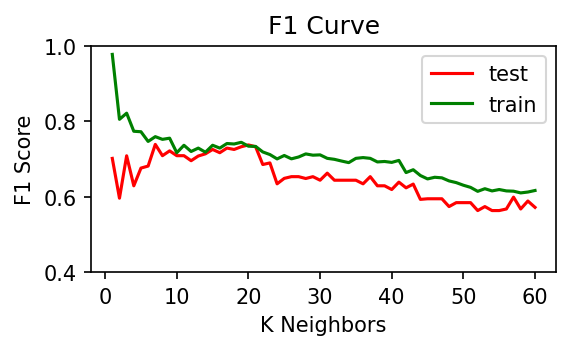

In [ ]:
# plotting the Curvesg
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k[0:60], test_f1[0:60], color = 'red' , label = 'test')
plt.plot(k[0:60], train_f1[0:60], color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()

# Challenges with Test set

In [ ]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 96, stratify = y) # stratify

In [ ]:
# calling above defined function
k = range(1,50)
train, test = F1score(k) 

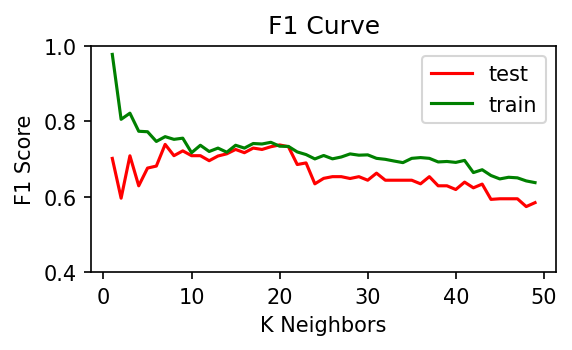

In [ ]:
# plotting the Curves
plt.figure(figsize=(4,2), dpi=150)
plt.plot(k, test, color = 'red' , label = 'test')
plt.plot(k, train, color = 'green', label = 'train')
plt.xlabel('K Neighbors')
plt.ylabel('F1 Score')
plt.title('F1 Curve')
plt.ylim(0.4,1)
plt.legend()